   #  Importing The Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

  #  Importing The Dataset

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.quality.mean()

5.6360225140712945

In [9]:
df.quality.std()

0.8075694397347023

  # Removing The Outliers /Cleaning The Dataset

In [10]:
df['zscore'] = (df.quality  - df.quality.mean())/df.quality.std()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.787576
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.787576
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.787576
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.450707
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.787576


In [11]:
df[df['zscore']>3].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore


In [12]:
df[df['zscore']<-3].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,-3.264143
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,-3.264143
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,-3.264143
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,-3.264143
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,-3.264143


In [13]:
df[(df.zscore<-3)  |  (df.zscore>3)].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,-3.264143
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,-3.264143
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,-3.264143
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,-3.264143
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,-3.264143


In [14]:
df1 = df[(df.zscore>-3)  &  (df.zscore<3)]
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.787576
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.787576
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.787576
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.450707
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.787576


In [15]:
df1.shape

(1589, 13)

   # Exploratory Analysis of the Dataset

In [16]:
new_df = df.groupby('quality').mean()
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,zscore
quality,,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,-3.264143
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,-2.025860
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,-0.787576
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,0.450707
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,1.688991


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

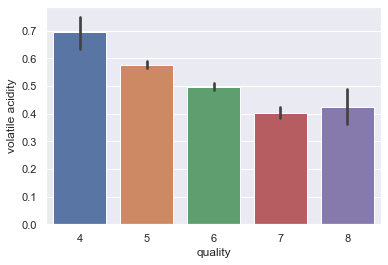

In [17]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = df1)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

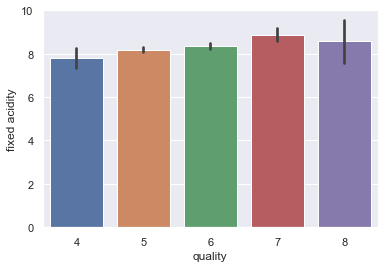

In [18]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = df1)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

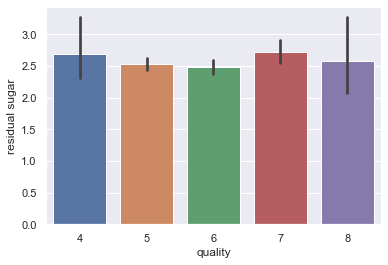

In [19]:
sns.barplot(x = 'quality', y = 'residual sugar', data = df1)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

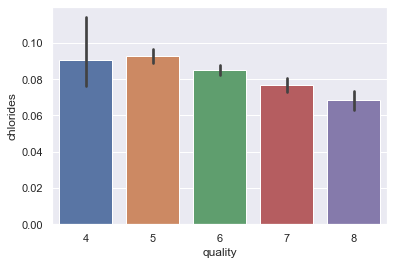

In [20]:
sns.barplot(x = 'quality', y = 'chlorides', data = df1)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

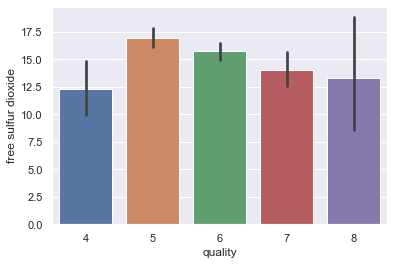

In [21]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df1)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

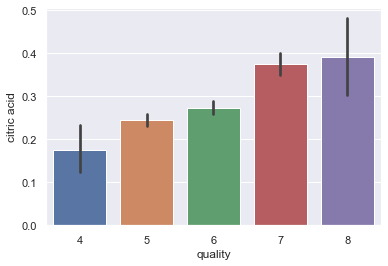

In [22]:
sns.barplot(x = 'quality', y = 'citric acid', data = df1)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

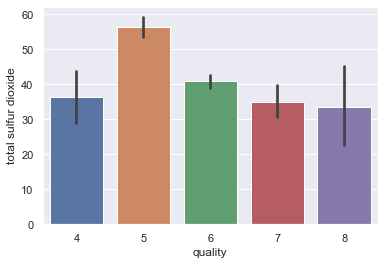

In [23]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df1)

<AxesSubplot:xlabel='quality', ylabel='count'>

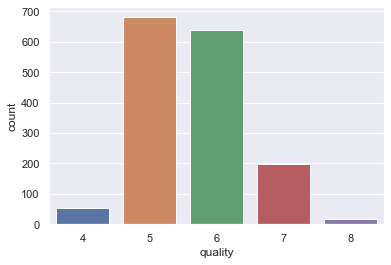

In [24]:
sns.countplot(df1['quality'])

   #   Training and Testing the Model 

In [25]:
X = df1.drop(["quality"], axis=1)
y = df1.quality
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,zscore
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-0.787576
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-0.787576
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-0.787576
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0.450707
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-0.787576


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [27]:
(y_test)

1389    5
1259    6
1148    6
513     7
1125    7
       ..
1568    5
1100    6
706     5
677     5
504     7
Name: quality, Length: 1113, dtype: int64

In [28]:
(X_train).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,zscore
996,5.6,0.660,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,1.688991
713,8.0,0.430,0.36,2.3,0.075,10.0,48.0,0.99760,3.34,0.46,9.4,-0.787576
1240,7.5,0.610,0.20,1.7,0.076,36.0,60.0,0.99494,3.10,0.40,9.3,-0.787576
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,-0.787576
1370,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,-0.787576


In [29]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,zscore
1389,6.7,0.48,0.02,2.2,0.080,36.0,111.0,0.99524,3.10,0.53,9.7,-0.787576
1259,6.8,0.64,0.00,2.7,0.123,15.0,33.0,0.99538,3.44,0.63,11.3,0.450707
1148,7.8,0.39,0.42,2.0,0.086,9.0,21.0,0.99526,3.39,0.66,11.6,0.450707
513,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,1.688991
1125,8.8,0.24,0.35,1.7,0.055,13.0,27.0,0.99394,3.14,0.59,11.3,1.688991


In [30]:
y_train

996     7
713     5
1240    5
396     5
1370    5
       ..
959     5
1191    5
1531    5
923     6
1482    4
Name: quality, Length: 476, dtype: int64

In [31]:
from sklearn.ensemble       import RandomForestClassifier

In [32]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_predicted = model.predict(X_test)

In [34]:
from sklearn  import metrics
metrics.accuracy_score(y_test,y_predicted)

0.9766397124887691

In [35]:
from sklearn.ensemble  import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 150)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [36]:
from sklearn  import metrics
metrics.accuracy_score(y_test,y_predicted)

0.9766397124887691

In [37]:
from sklearn.model_selection  import cross_val_score

In [38]:
cross_val_score(RandomForestClassifier(n_estimators =5),X,y,cv = 3)

array([0.96226415, 0.99433962, 0.98487713])

  # parameter tunning

In [39]:
cross_val_score(RandomForestClassifier(n_estimators =40),X,y,cv = 3)

array([0.98679245, 0.98113208, 0.9905482 ])

In [40]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators =10),X,y,cv = 10)
np.average(scores1)

0.9867884722553935

In [41]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators =10),X,y,cv = 10)
np.average(scores2)

0.9867844916805988

In [42]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators =20),X,y,cv = 10)
np.average(scores3)

0.9911949685534591

In [43]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators =30),X,y,cv = 10)
np.average(scores4)

0.9918238993710693

In [44]:
scores5 = cross_val_score(RandomForestClassifier(n_estimators =40),X,y,cv = 10)
np.average(scores5)

0.989304195525834